In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import ticker
import lmfit as lm
import scipy as sp
import corner
import emcee
import math
import pandas as pd
from lc_lmfit import *

In [2]:
folder='data/'
filename='_LC_log.txt'

FXRTs=['FXRT_1','FXRT_2','FXRT_3','FXRT_4','FXRT_5','FXRT_6','FXRT_7',
      'FXRT_8','FXRT_9','FXRT_10','FXRT_11','FXRT_12','FXRT_13','FXRT_14',
      'FXRT_15','FXRT_16','FXRT_17','FXRT_18','FXRT_19','FXRT_20','FXRT_21','FXRT_22']

jonathan_fits = {
    "FXRT_1": [],
    "FXRT_2": [5.9e3, 0.04, 1.7, 3.6e-14],
    "FXRT_3": [1.5e3, -0.1, 0.8, 1.9e-14],
    "FXRT_4": [],
    "FXRT_5": [],
    "FXRT_6": [0.3, 4.8e-14],
    "FXRT_7": [1.1e3, -0.2, 1.6, 1.4e-12],
    "FXRT_8": [23.8e3, -0.2, 2.0, 5.6e-15],
    "FXRT_9": [5.3e3, -0.2, 2.8, 1.8e-14],
    "FXRT_10": [2.7e3, -0.0, 2.4, 2.0e-14],
    "FXRT_11": [],
    "FXRT_12": [1.8e3, -0.0, 1.9, 2.0e-13],
    "FXRT_13": [0.2, 3.3e-14],
    "FXRT_14": [0.2e3, -0.4, 1.6, 8.2e-13],
    "FXRT_15": [3.7e3, -0.4, 2.9, 6.8e-14],
    "FXRT_16": [2.2e3, 0.09, 2.0, 4.1e-13],
    "FXRT_17": [0.3, 8.6e-13],
    "FXRT_18": [0.5, 4.6e-11],
    "FXRT_19": [2.1e3, 0.1, 1.9, 5.5e-13],
    "FXRT_20": [0.1e3, -1.0, 2.5, 4.2e-12],
    "FXRT_21": [0.4, 1.1e-12],
    "FXRT_22": [4.4e3, 0.2, 3.8, 3.2e-13]
}

refit_params = {}


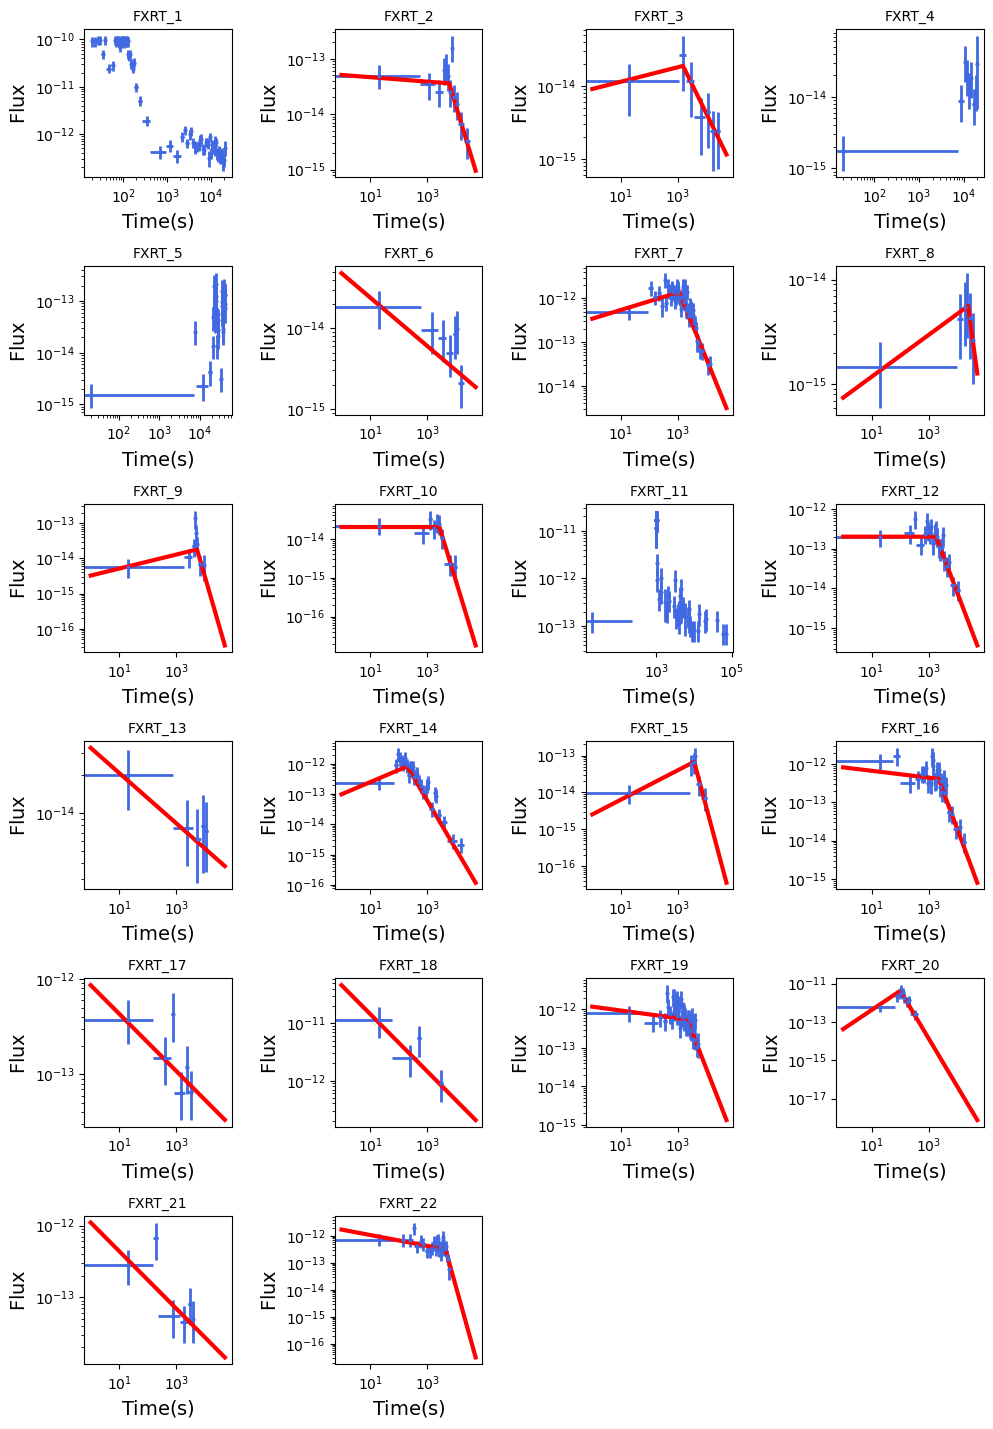

<Figure size 640x480 with 0 Axes>

In [3]:
fig=plt.figure(figsize=(10.0,15.0), dpi=100)
fig.patch.set_facecolor('white')
plt.subplots_adjust(top=0.96, bottom=0.07, left=0.07, right=0.97, hspace=0.6,wspace=0.7)

for i in range(len(FXRTs)):
    ax1 = fig.add_subplot(6, 4, i+1)
    Time,Flux,Time_low,Time_high,Flux_low,Flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
    ax1.errorbar(Time,Flux,xerr=[Time_low,Time_high],yerr=[Flux_low,Flux_high],fmt='.',color='royalblue',linewidth=2.0,markersize=4.0)
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    #ax1.set_xlim(1e1,1e5)
    #ax1.set_ylim(1e-14,1e-9)
    ax1.set_xlabel('$\mathrm{Time(s)}$',fontsize=14.)
    ax1.set_ylabel('$\mathrm{Flux}$',fontsize=14.)
    ax1.set_title(FXRTs[i],fontsize=10)
    x=np.arange(1,5e4,10)
    param = jonathan_fits[FXRTs[i]]
    if len(jonathan_fits[FXRTs[i]])==4:
        ax1.plot(x,broken_power_law(x, *param),color='r',linewidth=3.0,label='$\mathrm{BPL}$',zorder=2.0)
    elif len(jonathan_fits[FXRTs[i]])==2:
        ax1.plot(x,power_law(x,*param),color='r',linewidth=3.0,label='$\mathrm{BPL}$',zorder=2.0)


plt.show()
plt.subplots_adjust(top=0.96, bottom=0.07, left=0.07, right=0.97, hspace=0.6,wspace=0.9)

### FXRT 1, i=0

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 55
    # data points      = 34
    # variables        = 4
    chi-square         = 2.86926783
    reduced chi-square = 0.09564226
    Akaike info crit   = -76.0583237
    Bayesian info crit = -69.9528816
[[Variables]]
    t_break:    118.150021 +/- 2.34022110 (1.98%) (init = 200)
    alpha_1:    0.01187173 +/- 0.05584292 (470.39%) (init = 0.5)
    alpha_2:    3.97005824 +/- 0.16515920 (4.16%) (init = 4)
    amplitude:  9.1989e-11 +/- 3.9923e-12 (4.34%) (init = 1e-10)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = -0.7140
    C(t_break, alpha_2)   = +0.6407
    C(t_break, amplitude) = -0.5557
    C(t_break, alpha_1)   = +0.3941


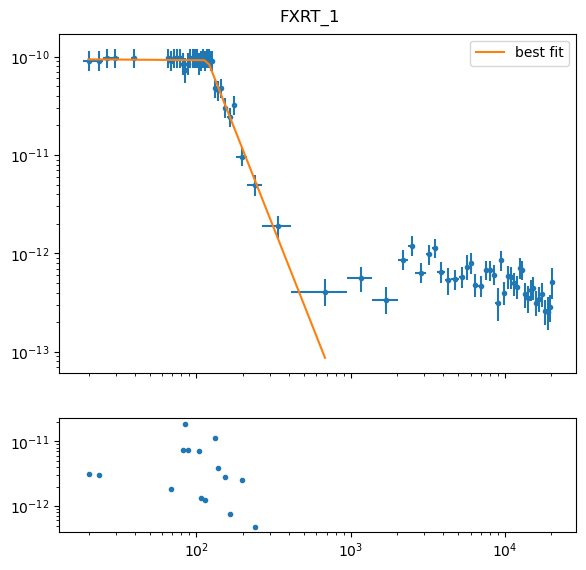

20.0 3.2409602254629135 0 34


name,value,standard error,relative error,initial value,min,max,vary
t_break,118.150021,2.34022110,(1.98%),200,50.0000000,300.000000,True
alpha_1,0.01187173,0.05584292,(470.39%),0.5,0.00000000,5.00000000,True
alpha_2,3.97005824,0.16515920,(4.16%),4,1.00000000,10.0000000,True
amplitude,9.1989e-11,3.9923e-12,(4.34%),1e-10,1.0000e-11,1.0000e-09,True


In [4]:
i=0
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
time = np.delete(time, [4, 6,7])
flux = np.delete(flux, [4, 6,7])
time_high = np.delete(time_high, [4, 6,7])
time_low = np.delete(time_low, [4, 6,7])
flux_high = np.delete(flux_high, [4, 6,7])
flux_low = np.delete(flux_low, [4, 6,7])

flux_err = flux_high + flux_low
time_err = time_high + time_low

ee_start_index = np.where(time > 0)[0][0]
fit_end_index = np.where(time < 1e3)[0][-1]

params=lm.Parameters()
params.add("t_break", min = 50, max = 300, value = 200)
params.add("alpha_1", min = 0, max = 5.0, value = 0.5)
params.add("alpha_2", min = 1, max = 10.0, value = 4)
params.add("amplitude", min = 1e-11, max = 1e-9, value = 1e-10)


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[ee_start_index:fit_end_index], flux[ee_start_index:fit_end_index], time_err[ee_start_index:fit_end_index], flux_err[ee_start_index:fit_end_index]))
result = minner.minimize(method="least_squares")
lm.printfuncs.report_fit(result)

residuals = broken_power_law(time[ee_start_index:fit_end_index], result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux[ee_start_index:fit_end_index]

x=np.geomspace(time[ee_start_index], time[fit_end_index])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y,label ='best fit', zorder=10)
# ax1.loglog(x,nbroken_law(x,[107], [0.5, 4], 1e-7),label ='guess')
ax1.legend()
ax2.loglog(time[ee_start_index:fit_end_index],residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[ee_start_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[ee_start_index]})

print(time[ee_start_index], time_err[ee_start_index], ee_start_index, fit_end_index)

result.params

### FXRT 2, i=1

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 65
    # data points      = 12
    # variables        = 4
    chi-square         = 1.30793907
    reduced chi-square = 0.16349238
    Akaike info crit   = -18.5974478
    Bayesian info crit = -16.6578212
[[Variables]]
    t_break:    5887.50904 +/- 1567.86182 (26.63%) (init = 5900)
    alpha_1:    0.04015942 +/- 0.09653554 (240.38%) (init = 0.04)
    alpha_2:    1.65092238 +/- 0.42276614 (25.61%) (init = 1.7)
    amplitude:  3.5683e-14 +/- 9.3916e-15 (26.32%) (init = 3.6e-14)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = -0.6768
    C(t_break, alpha_2)   = +0.6472
    C(t_break, amplitude) = -0.6241
    C(t_break, alpha_1)   = +0.4052


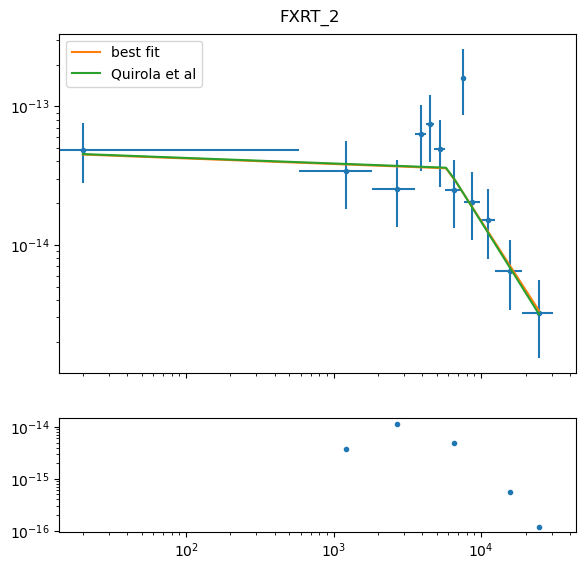

20.0 1124.6265544891357


name,value,standard error,relative error,initial value,min,max,vary
t_break,5887.50904,1567.86182,(26.63%),5900.0,1000.00000,10000.0000,True
alpha_1,0.04015942,0.09653554,(240.38%),0.04,-1.00000000,5.00000000,True
alpha_2,1.65092238,0.42276614,(25.61%),1.7,0.00000000,10.0000000,True
amplitude,3.5683e-14,9.3916e-15,(26.32%),3.6e-14,1.0000e-14,1.0000e-12,True


In [5]:
i=1
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("t_break", min = 1e3, max = 1e4, value = jonathan_params[0])
params.add("alpha_1", min = -1, max = 5.0, value = jonathan_params[1])
params.add("alpha_2", min = 0, max = 10.0, value = jonathan_params[2])
params.add("amplitude", min = 1e-14, max = 1e-12, value = jonathan_params[3])


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = broken_power_law(time, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[0], time[-1])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})

print(time[fit_index], time_err[fit_index])
result.params

### FXRT 3, i=2

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 157
    # data points      = 7
    # variables        = 4
    chi-square         = 0.21188488
    reduced chi-square = 0.07062829
    Akaike info crit   = -16.4833562
    Bayesian info crit = -16.6997156
[[Variables]]
    t_break:    1497.84479 +/- 1427.93664 (95.33%) (init = 1500)
    alpha_1:   -0.07000000 +/- 0.17132806 (244.75%) (init = -0.07)
    alpha_2:    0.77890207 +/- 0.26194893 (33.63%) (init = 0.8)
    amplitude:  1.6664e-14 +/- 9.9109e-15 (59.48%) (init = 1.9e-14)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = -0.8726
    C(t_break, amplitude) = -0.7568
    C(t_break, alpha_1)   = +0.6989
    C(t_break, alpha_2)   = +0.5580


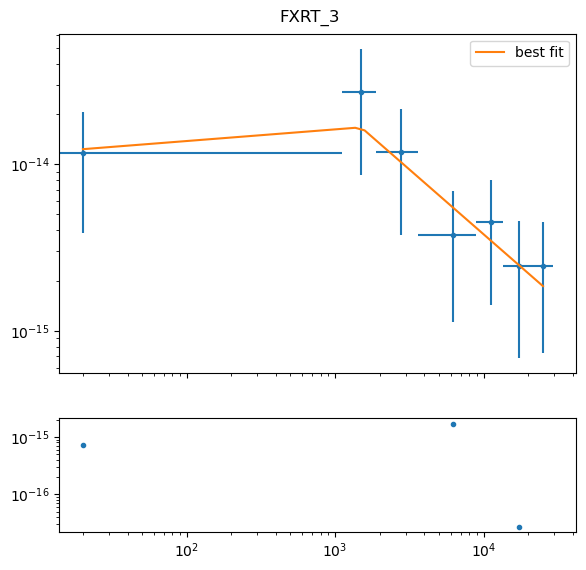

20.0 2186.142284452915 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,1497.84479,1427.93664,(95.33%),1500.0,1400.00000,3000.00000,True
alpha_1,-0.07000000,0.17132806,(244.75%),-0.07,-0.07000000,2.00000000,True
alpha_2,0.77890207,0.26194893,(33.63%),0.8,0.00000000,10.0000000,True
amplitude,1.6664e-14,9.9109e-15,(59.48%),1.9e-14,1.0000e-15,1.0000e-12,True


In [6]:
i=2
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("t_break", min = 1.4e3, max = 3e3, value = jonathan_params[0])
params.add("alpha_1", min = -0.07, max = 2.0, value = jonathan_params[1])
params.add("alpha_2", min = 0, max = 10.0, value = jonathan_params[2])
params.add("amplitude", min = 1e-15, max = 1e-12, value = jonathan_params[3])


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = broken_power_law(time, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[fit_index], time[-1])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})

print(time[fit_index], time_err[fit_index], fit_index)
result.params

In [7]:
time[1]

1497.8447806537151

### FXRT 4, i=3

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 120
    # data points      = 8
    # variables        = 4
    chi-square         = 0.70478568
    reduced chi-square = 0.17619642
    Akaike info crit   = -11.4344245
    Bayesian info crit = -11.1166583
[[Variables]]
    t_break:    13917.6337 +/- 5781.85006 (41.54%) (init = 10000)
    alpha_1:   -0.31439430 +/- 0.08487586 (27.00%) (init = 0.5)
    alpha_2:    1.49332380 +/- 3.64704055 (244.22%) (init = 4)
    amplitude:  1.3626e-14 +/- 3.4577e-15 (25.38%) (init = 1e-13)
[[Correlations]] (unreported correlations are < 0.100)
    C(t_break, alpha_2)   = +0.8498
    C(alpha_1, amplitude) = -0.4834
    C(alpha_2, amplitude) = +0.4374
    C(t_break, alpha_1)   = +0.1977
    C(t_break, amplitude) = +0.1339


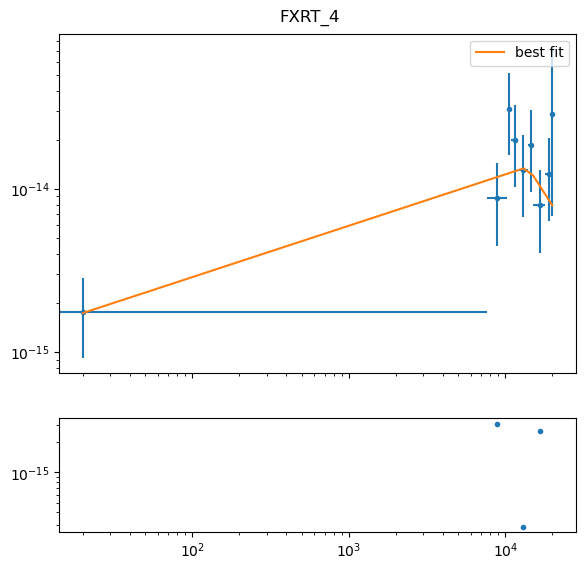

20.0 15148.463271975517 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,13917.6337,5781.85006,(41.54%),10000.0,5000.00000,50000.0000,True
alpha_1,-0.31439430,0.08487586,(27.00%),0.5,-5.00000000,5.00000000,True
alpha_2,1.49332380,3.64704055,(244.22%),4,0.00000000,10.0000000,True
amplitude,1.3626e-14,3.4577e-15,(25.38%),1e-13,1.0000e-15,1.0000e-12,True


In [8]:
i=3
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)

flux_err = flux_high + flux_low
time_err = time_high + time_low

ee_start_index = np.where(time > 0)[0][0]
fit_end_index = np.where(time < 2e4)[0][-1]

params=lm.Parameters()
params.add("t_break", min = 5e3, max = 5e4, value = 1e4)
params.add("alpha_1", min = -5, max = 5.0, value = 0.5)
params.add("alpha_2", min = 0, max = 10.0, value = 4)
params.add("amplitude", min = 1e-15, max = 1e-12, value = 1e-13)


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[ee_start_index:fit_end_index], flux[ee_start_index:fit_end_index], time_err[ee_start_index:fit_end_index], flux_err[ee_start_index:fit_end_index]))
result = minner.minimize(method="least_squares")
lm.printfuncs.report_fit(result)

residuals = broken_power_law(time[ee_start_index:fit_end_index], result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux[ee_start_index:fit_end_index]

x=np.geomspace(time[ee_start_index], time[fit_end_index])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y,label ='best fit', zorder=10)
# ax1.loglog(x,nbroken_law(x,[107], [0.5, 4], 1e-7),label ='guess')
ax1.legend()
ax2.loglog(time[ee_start_index:fit_end_index],residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[ee_start_index]}) 
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[ee_start_index]})

print(time[ee_start_index], time_err[ee_start_index], ee_start_index)

result.params

### FXRT 5, i=4

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 10
    # data points      = 2
    # variables        = 4
    chi-square         = 1.57833613
    reduced chi-square = 1.57833613
    Akaike info crit   = 7.52644806
    Bayesian info crit = 2.29903678
##  Warning: uncertainties could not be estimated:
    t_break:    at initial value
    alpha_1:    at initial value
    alpha_2:    at initial value
    amplitude:  at initial value
    amplitude:  at boundary
[[Variables]]
    t_break:    8000.00000 (init = 8000)
    alpha_1:   -0.70000000 (init = -0.7)
    alpha_2:    10.0000000 (init = 10)
    amplitude:  5.9146e-14 (init = 1e-14)


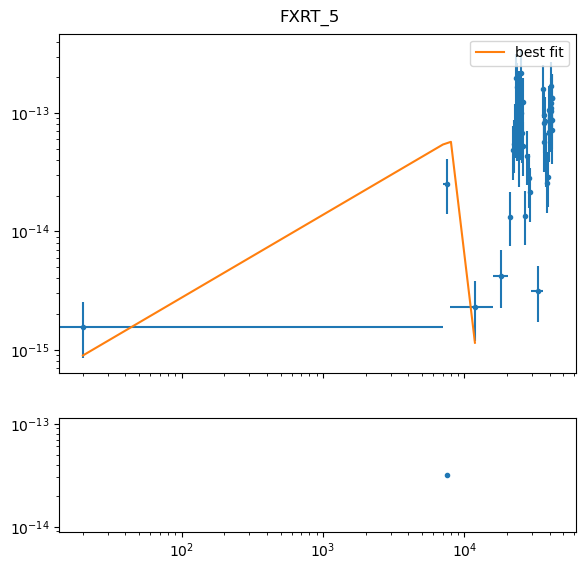

20.0 14185.929190337658 0 2


name,value,initial value,min,max,vary
t_break,8000.00000,8000.0,7000.00000,9000.00000,True
alpha_1,-0.70000000,-0.7,-15.0000000,10.0000000,True
alpha_2,10.0000000,10,0.00000000,20.0000000,True
amplitude,5.9146e-14,1e-14,1.0000e-16,2.0000e-13,True


In [9]:

i=4
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)

flux_err = flux_high + flux_low
time_err = time_high + time_low

ee_start_index = np.where(time > 0)[0][0]
fit_end_index = np.where(time < 1.8e4)[0][-1]

params=lm.Parameters()
params.add("t_break", min = 7e3, max = 9e3, value = 8e3)
params.add("alpha_1", min = -15, max = 10.0, value = -0.7)
params.add("alpha_2", min = 0, max = 20.0, value = 10)
params.add("amplitude", min = 1e-16, max = 2e-13, value =  1e-14)


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[ee_start_index:fit_end_index], flux[ee_start_index:fit_end_index], time_err[ee_start_index:fit_end_index], flux_err[ee_start_index:fit_end_index]))
result = minner.minimize(method="least_squares")
lm.printfuncs.report_fit(result)

residuals = broken_power_law(time[ee_start_index:fit_end_index], result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux[ee_start_index:fit_end_index]

x=np.geomspace(time[ee_start_index], time[fit_end_index])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y,label ='best fit', zorder=10)
# ax1.loglog(x,nbroken_law(x,[107], [0.5, 4], 1e-7),label ='guess')
ax1.legend()
ax2.loglog(time[ee_start_index:fit_end_index],residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[ee_start_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[ee_start_index]})


print(time[ee_start_index], time_err[ee_start_index], ee_start_index, fit_end_index)

result.params

### FXRT = 6, i=5

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 33
    # data points      = 7
    # variables        = 2
    chi-square         = 0.95548740
    reduced chi-square = 0.19109748
    Akaike info crit   = -9.94010695
    Bayesian info crit = -10.0482866
[[Variables]]
    alpha_1:    0.27560643 +/- 0.07528194 (27.32%) (init = 0.3)
    amplitude:  4.7249e-14 +/- 2.8394e-14 (60.09%) (init = 4.8e-14)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = +0.9375


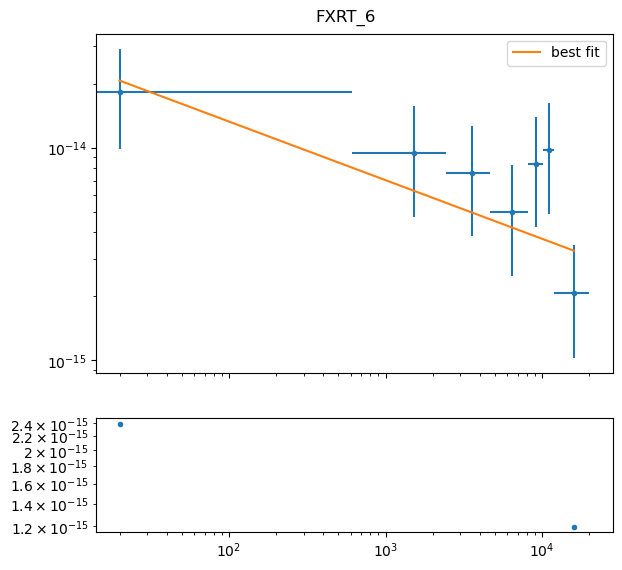

20.0 1184.165604531765 0


name,value,standard error,relative error,initial value,min,max,vary
alpha_1,0.27560643,0.07528194,(27.32%),0.3,-1.00000000,5.00000000,True
amplitude,4.7249e-14,2.8394e-14,(60.09%),4.8e-14,1.0000e-16,1.0000e-12,True


In [10]:
i=5
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("alpha_1", min = -1, max = 5.0, value = jonathan_params[0])
params.add("amplitude", min = 1e-16, max = 1e-12, value = jonathan_params[1])


minner = lm.Minimizer(cost_func_pl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
alp1 = bfit["alpha_1"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = power_law(time, result.params['alpha_1'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[0], time[-1])
y = power_law(x, result.params['alpha_1'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)

result.params

### FXRT = 7, i=6

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 50
    # data points      = 55
    # variables        = 4
    chi-square         = 11.4590340
    reduced chi-square = 0.22468694
    Akaike info crit   = -78.2705123
    Bayesian info crit = -70.2411796
[[Variables]]
    t_break:    1114.08197 +/- 101.926499 (9.15%) (init = 1100)
    alpha_1:   -0.22085699 +/- 0.08479733 (38.39%) (init = -0.2)
    alpha_2:    1.55239051 +/- 0.10234296 (6.59%) (init = 1.6)
    amplitude:  1.3641e-12 +/- 1.3862e-13 (10.16%) (init = 1.4e-12)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = -0.6526
    C(t_break, amplitude) = -0.6023
    C(t_break, alpha_2)   = +0.5505
    C(t_break, alpha_1)   = +0.4669
    C(alpha_2, amplitude) = +0.1095


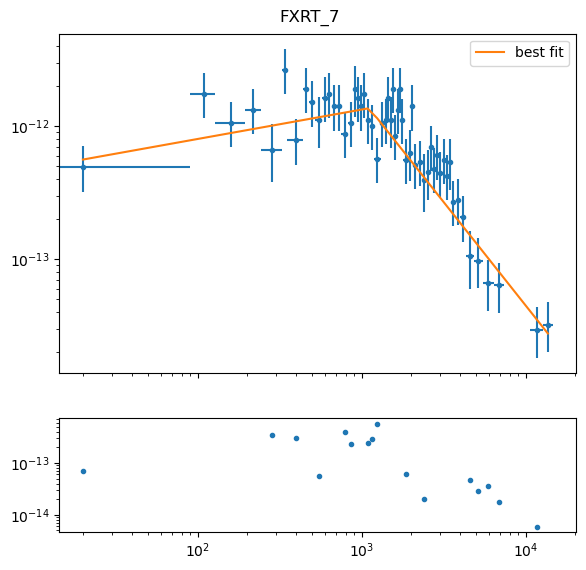

20.0 139.3630158007145 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,1114.08197,101.926499,(9.15%),1100.0,500.000000,10000.0000,True
alpha_1,-0.22085699,0.08479733,(38.39%),-0.2,-5.00000000,5.00000000,True
alpha_2,1.55239051,0.10234296,(6.59%),1.6,0.00000000,10.0000000,True
amplitude,1.3641e-12,1.3862e-13,(10.16%),1.4e-12,1.0000e-13,1.0000e-11,True


In [11]:
i=6
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("t_break", min = 5e2, max = 1e4, value = jonathan_params[0])
params.add("alpha_1", min = -5, max = 5.0, value = jonathan_params[1])
params.add("alpha_2", min = 0, max = 10.0, value = jonathan_params[2])
params.add("amplitude", min = 1e-13, max = 1e-11, value = jonathan_params[3])


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = broken_power_law(time, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[0], time[-1])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)
result.params

### FXRT 8, i=7

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 98
    # data points      = 6
    # variables        = 4
    chi-square         = 0.03381610
    reduced chi-square = 0.01690805
    Akaike info crit   = -23.0714664
    Bayesian info crit = -23.9044285
[[Variables]]
    t_break:    23753.5748 +/- 3280.66817 (13.81%) (init = 23800)
    alpha_1:   -0.18960293 +/- 0.03010800 (15.88%) (init = -0.2)
    alpha_2:    2.02885770 +/- 1.08007493 (53.24%) (init = 2)
    amplitude:  5.5570e-15 +/- 5.5329e-16 (9.96%) (init = 5.6e-15)
[[Correlations]] (unreported correlations are < 0.100)
    C(t_break, alpha_2)   = +0.8425
    C(alpha_1, amplitude) = -0.5565
    C(alpha_2, amplitude) = +0.2216
    C(t_break, alpha_1)   = +0.1977
    C(t_break, amplitude) = -0.1018


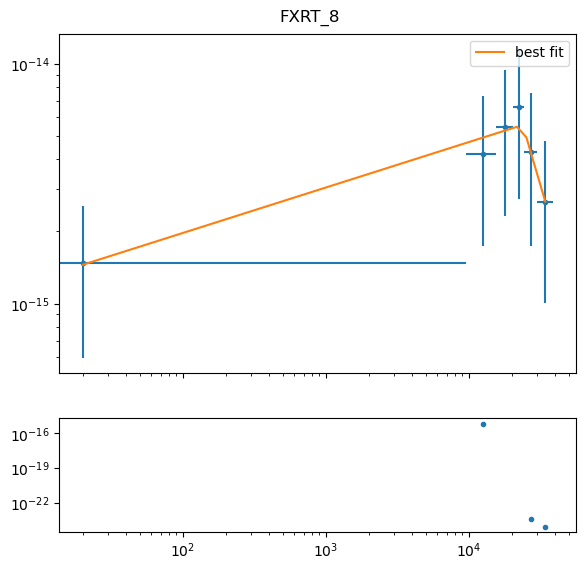

20.0 18940.237333536148 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,23753.5748,3280.66817,(13.81%),23800.0,10000.0000,50000.0000,True
alpha_1,-0.18960293,0.03010800,(15.88%),-0.2,-5.00000000,5.00000000,True
alpha_2,2.02885770,1.08007493,(53.24%),2.0,0.00000000,10.0000000,True
amplitude,5.5570e-15,5.5329e-16,(9.96%),5.6e-15,1.0000e-16,1.0000e-12,True


In [12]:
i=7
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("t_break", min = 1e4, max = 5e4, value = jonathan_params[0])
params.add("alpha_1", min = -5, max = 5.0, value = jonathan_params[1])
params.add("alpha_2", min = 0, max = 10.0, value = jonathan_params[2])
params.add("amplitude", min = 1e-16, max = 1e-12, value = jonathan_params[3])


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = broken_power_law(time, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[0], time[-1])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)

result.params

### FXRT 9, i=8

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 104
    # data points      = 8
    # variables        = 4
    chi-square         = 1.35868823
    reduced chi-square = 0.33967206
    Akaike info crit   = -6.18337478
    Bayesian info crit = -5.86560861
[[Variables]]
    t_break:    4782.65181 +/- 802.077559 (16.77%) (init = 5300)
    alpha_1:   -2.49975971 +/- 1.91660018 (76.67%) (init = -0.2)
    alpha_2:    4.28855974 +/- 2.90080130 (67.64%) (init = 2.8)
    amplitude:  4.1999e-14 +/- 2.0804e-14 (49.53%) (init = 1.8e-14)
[[Correlations]] (unreported correlations are < 0.100)
    C(t_break, alpha_2)   = +0.7220
    C(alpha_1, amplitude) = -0.5881
    C(alpha_2, amplitude) = +0.5112
    C(t_break, alpha_1)   = +0.4912


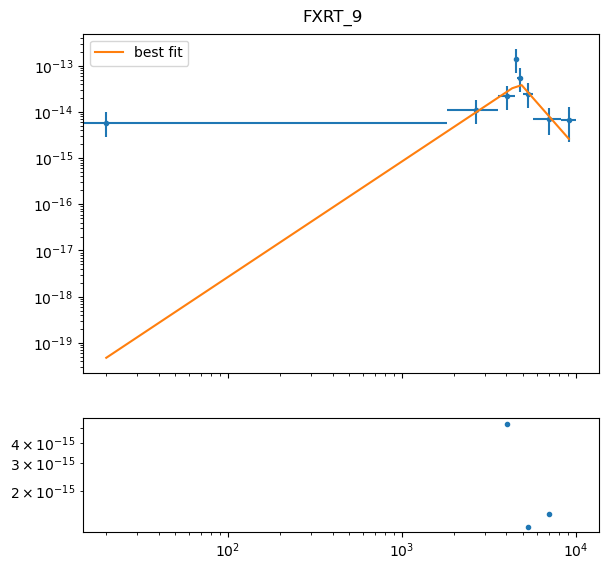

20.0 3584.547945857048 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,4782.65181,802.077559,(16.77%),5300.0,1000.00000,10000.0000,True
alpha_1,-2.49975971,1.91660018,(76.67%),-0.2,-5.00000000,5.00000000,True
alpha_2,4.28855974,2.90080130,(67.64%),2.8,0.00000000,10.0000000,True
amplitude,4.1999e-14,2.0804e-14,(49.53%),1.8e-14,1.0000e-15,1.0000e-12,True


In [13]:
i=8
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("t_break", min = 1e3, max = 1e4, value = jonathan_params[0])
params.add("alpha_1", min = -5, max = 5.0, value = jonathan_params[1])
params.add("alpha_2", min = 0, max = 10.0, value = jonathan_params[2])
params.add("amplitude", min = 1e-15, max = 1e-12, value = jonathan_params[3])


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = broken_power_law(time, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[fit_index], time[-1])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)

result.params

### FXRT 10, i=9

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 124
    # data points      = 9
    # variables        = 4
    chi-square         = 0.49644224
    reduced chi-square = 0.09928845
    Akaike info crit   = -18.0776145
    Bayesian info crit = -17.2887161
[[Variables]]
    t_break:    2708.69522 +/- 534.924959 (19.75%) (init = 2700)
    alpha_1:    0.00106805 +/- 0.09334786 (8740.01%) (init = -0)
    alpha_2:    2.39236966 +/- 0.61636960 (25.76%) (init = 2.4)
    amplitude:  1.9557e-14 +/- 4.2950e-15 (21.96%) (init = 2e-14)
[[Correlations]] (unreported correlations are < 0.100)
    C(t_break, alpha_2)   = +0.7409
    C(alpha_1, amplitude) = -0.7004
    C(t_break, amplitude) = -0.5542
    C(t_break, alpha_1)   = +0.3877


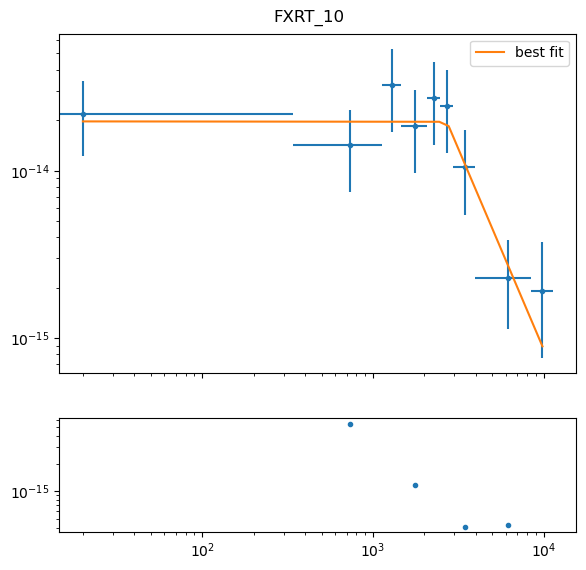

20.0 637.6228026747704 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,2708.69522,534.924959,(19.75%),2700.0,1000.00000,10000.0000,True
alpha_1,0.00106805,0.09334786,(8740.01%),-0.0,-5.00000000,5.00000000,True
alpha_2,2.39236966,0.61636960,(25.76%),2.4,0.00000000,10.0000000,True
amplitude,1.9557e-14,4.2950e-15,(21.96%),2e-14,1.0000e-14,1.0000e-12,True


In [14]:
i=9
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("t_break", min = 1e3, max = 1e4, value = jonathan_params[0])
params.add("alpha_1", min = -5, max = 5.0, value = jonathan_params[1])
params.add("alpha_2", min = 0, max = 10.0, value = jonathan_params[2])
params.add("amplitude", min = 1e-14, max = 1e-12, value = jonathan_params[3])


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = broken_power_law(time, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[0], time[-1])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)


result.params

### FXRT 11, i=10

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 50
    # data points      = 21
    # variables        = 4
    chi-square         = 3.25268581
    reduced chi-square = 0.19133446
    Akaike info crit   = -31.1658690
    Bayesian info crit = -26.9877792
##  Warning: uncertainties could not be estimated:
    amplitude:  at initial value
    amplitude:  at boundary
[[Variables]]
    t_break:    950.036846 +/-        nan (nan%) (init = 1000)
    alpha_1:   -1.46806543 +/-        nan (nan%) (init = -1)
    alpha_2:    28.7705210 +/- 3.49065628 (12.13%) (init = 4)
    amplitude:  3.6469e-11 +/-        nan (nan%) (init = 1e-11)


/Users/kruthik/opt/miniconda3/envs/fxt/lib/python3.11/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/kruthik/opt/miniconda3/envs/fxt/lib/python3.11/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


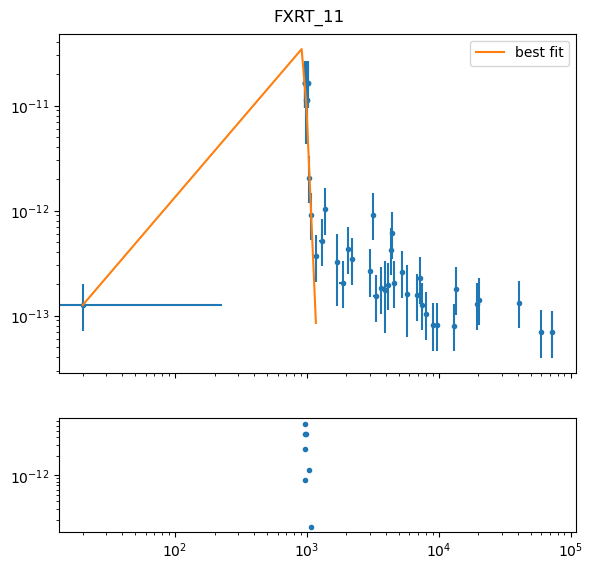

20.0 411.47136121988297 0 21


name,value,standard error,relative error,initial value,min,max,vary
t_break,950.036846,nan,(nan%),1000.0,300.000000,1500.00000,True
alpha_1,-1.46806543,nan,(nan%),-1,-10.0000000,5.00000000,True
alpha_2,28.7705210,3.49065628,(12.13%),4,0.00000000,40.0000000,True
amplitude,3.6469e-11,nan,(nan%),1e-11,1.0000e-13,8.0000e-11,True


In [15]:
i=10
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)

flux_err = flux_high + flux_low
time_err = time_high + time_low

ee_start_index = np.where(time > 0)[0][0]
fit_end_index = np.where(time < 1.178e3)[0][-1]

params=lm.Parameters()
params.add("t_break", min = 3e2, max = 1.5e3, value = 1e3)
params.add("alpha_1", min = -10, max = 5.0, value = -1)
params.add("alpha_2", min = 0, max = 40.0, value = 4)
params.add("amplitude", min = 1e-13, max = 8e-11, value = 1e-11)


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[ee_start_index:fit_end_index], flux[ee_start_index:fit_end_index], time_err[ee_start_index:fit_end_index], flux_err[ee_start_index:fit_end_index]))
result = minner.minimize(method="least_squares")
lm.printfuncs.report_fit(result)

residuals = broken_power_law(time[ee_start_index:fit_end_index], result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux[ee_start_index:fit_end_index]

x=np.geomspace(time[ee_start_index], time[fit_end_index])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y,label ='best fit', zorder=10)

ax1.legend()
ax2.loglog(time[ee_start_index:fit_end_index],residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[ee_start_index]}) 
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[ee_start_index]})

print(time[ee_start_index], time_err[ee_start_index], ee_start_index, fit_end_index)

result.params

In [16]:
refit_params

{'FXRT_1': {'t_break': 118.15002096061397,
  'alpha_1': 0.011871733671031429,
  'alpha_2': 3.9700582369830086,
  'amplitude': 9.198881992200755e-11,
  't_break_err': 2.340221097371868,
  'alpha_1_err': 0.05584292415267419,
  'alpha_2_err': 0.16515919776840576,
  'amplitude_err': 3.992260058342998e-12,
  'time_plt_start': 20.0,
  'time_plt_start_err': 3.2409602254629135},
 'FXRT_2': {'t_break': 5887.509037863256,
  'alpha_1': 0.04015942273220961,
  'alpha_2': 1.6509223794050256,
  'amplitude': 3.568256868866772e-14,
  't_break_err': 1567.8618158308993,
  'alpha_1_err': 0.0965355400438924,
  'alpha_2_err': 0.42276614214388736,
  'amplitude_err': 9.391608406561496e-15,
  'time_plt_start': 20.0,
  'time_plt_start_err': 1124.6265544891357},
 'FXRT_3': {'t_break': 1497.844786122936,
  'alpha_1': -0.06999999999999999,
  'alpha_2': 0.7789020667526296,
  'amplitude': 1.6663725441726592e-14,
  't_break_err': 1427.936643659269,
  'alpha_1_err': 0.17132806140859003,
  'alpha_2_err': 0.261948933687

In [17]:
df_refit_params = pd.DataFrame.from_dict(refit_params, orient='index')
df_refit_params.reset_index(inplace=True)
df_refit_params.rename(columns={'index':'FXRT_Name'}, inplace=True)
df_refit_params.to_csv('fxrt_refit_parameters.csv', index=False)
df_refit_params

,FXRT_Name,t_break,alpha_1,alpha_2,amplitude,t_break_err,alpha_1_err,alpha_2_err,amplitude_err,time_plt_start,time_plt_start_err
0,FXRT_1,118.150021,0.011872,3.970058,9.198882e-11,2.340221,0.055843,0.165159,3.992260e-12,20.0,3.240960
1,FXRT_2,5887.509038,0.040159,1.650922,3.568257e-14,1567.861816,0.096536,0.422766,9.391608e-15,20.0,1124.626554
2,FXRT_3,1497.844786,-0.070000,0.778902,1.666373e-14,1427.936644,0.171328,0.261949,9.910890e-15,20.0,2186.142284
3,FXRT_4,13917.633705,-0.314394,1.493324,1.362612e-14,5781.850055,0.084876,3.647041,3.457659e-15,20.0,15148.463272
4,FXRT_5,8000.000000,-0.700000,10.000000,5.914557e-14,NaN,NaN,NaN,NaN,20.0,14185.929190
5,FXRT_7,1114.081974,-0.220857,1.552391,1.364094e-12,101.926499,0.084797,0.102343,1.386166e-13,20.0,139.363016
6,FXRT_8,23753.574788,-0.189603,2.028858,5.556993e-15,3280.668167,0.030108,1.080075,5.532907e-16,20.0,18940.237334
7,FXRT_9,4782.651809,-2.499760,4.288560,4.199941e-14,802.077559,1.916600,2.900801,2.080413e-14,20.0,3584.547946
8,FXRT_10,2708.695218,0.001068,2.392370,1.955692e-14,534.924959,0.093348,0.616370,4.294969e-15,20.0,637.622803
9,FXRT_11,950.036846,-1.468065,28.770521,3.646904e-11,NaN,NaN,3.490656,NaN,20.0,411.471361
